## Importing Required Packages

- **TensorFlow**: Used for building models.
- **NumPy**: Handles numerical operations and multi-dimensional arrays.
- **OpenCV (cv2)**: Facilitates image manipulation and transformation.
- **Matplotlib**: Visualizes images and model outputs.
- **Keras**: High-level API for simplifying model building.
- **VGG16**: Pre-trained CNN for transfer learning in image classification.
- **preprocess_input**: Prepares images for VGG16 model input.
- **decode_predictions**: Converts model output into human-readable labels.

In [46]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

## Loading the Pre-Trained Model xD

VGG (Visual Geometry Group) is a deep convolutional neural network architecture that was developed by researchers at the University of Oxford. 

VGG16, one of the most well-known versions of this architecture, consists of 16 layers with learnable weights, including 13 convolutional layers and 3 fully connected layers. The network is characterized by its simplicity and depth, utilizing small receptive fields (3x3 filters) throughout its layers, which allows it to learn complex features while maintaining a manageable number of parameters. 

VGG16 was trained on the ImageNet dataset, which contains millions of labeled images across thousands of categories.

In [47]:
model = VGG16(weights='imagenet')

In [53]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## Image Pre-Processing

1. **Image Path**: The variable `img_path` specifies the location of the image file, which in this case is an image of a building from the Intel Image Classification dataset.

2. **Loading the Image**: The `image.load_img()` function from Keras is used to load the image from the specified path. The `target_size` parameter is set to (224, 224), which resizes the image to the dimensions expected by the VGG16 model.

3. **Converting to Array**: The loaded image is converted into a NumPy array using `image.img_to_array()`. This step transforms the image into a format that can be processed by the model.

4. **Expanding Dimensions**: The `np.expand_dims()` function adds an additional dimension to the array, converting it from a shape of (224, 224, 3) (height, width, channels) to (1, 224, 224, 3). This new shape represents a batch of one image, which is required by the model for input.

5. **Preprocessing**: Finally, `preprocess_input()` is applied to the array, which adjusts the pixel values to match the format that VGG16 expects (typically involving scaling the pixel values and centering them around zero).

In [48]:
img_path = '/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/10014.jpg'  # subject to change guys
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

## Helper Function 😊

The `display_prediction_info` function is a helper that outputs the results of image classification using a model like VGG16. 

### Parameters:
- **`pred_class_name`**: The name of the predicted class for the input image.
- **`preds`**: The raw prediction output from the model.

### Functionality:
1. **Decodes Predictions**: It uses `decode_predictions()` to convert raw predictions into human-readable labels and probabilities for the top 5 classes.
2. **Displays Results**: The function prints the predicted class name and iterates through the top 5 predictions, showing each label and its confidence score, formatted to two decimal places.

In [49]:
def display_prediction_info(pred_class_name, preds):
    class_probabilities = decode_predictions(preds, top=5)[0]
    print(f"Predicted Class: {pred_class_name}")
    print("Top 5 Predictions:")
    for i, (imagenet_id, label, score) in enumerate(class_probabilities):
        print(f"{i + 1}: {label} ({score:.2f})")

## Let's go for prediction 🚀

1. **Predictions**: `preds = model.predict(x)` gets the probabilities for each class.
2. **Top Class Index**: `predicted_class = np.argmax(preds[0])` finds the index of the highest probability.
3. **Class Name**: `pred_class_name = decode_predictions(preds, top=1)[0][0][1]` extracts the corresponding class name.

This identifies the most likely class for the input image

After let's call the helper function to display it

In [50]:
preds = model.predict(x)
predicted_class = np.argmax(preds[0])
pred_class_name = decode_predictions(preds, top=1)[0][0][1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


In [51]:
display_prediction_info(pred_class_name, preds)

Predicted Class: dome
Top 5 Predictions:
1: dome (0.42)
2: coil (0.22)
3: vault (0.21)
4: greenhouse (0.12)
5: yurt (0.01)


## Grad-Cam: Here we go 

Applicable for the VGG 16 (the layer names subject to change based on the model)

- **`layer_names`**: This variable holds the names of specific convolutional layers that will be visualized. In this example, it includes 'block3_conv3', 'block4_conv3', and 'block5_conv3'. You can adjust these names based on the specific layers of interest in your model.


In [52]:
layer_names = ['block3_conv3', 'block4_conv3', 'block5_conv3']

1. **Loop Through Layers**: For each layer in `layer_names`:
   - **Get Layer Output**: `last_conv_layer = model.get_layer(layer_name)` retrieves the output tensor of the specified convolutional layer.
   - **Create Grad-CAM Model**: A new model, `grad_model`, is created to map the input image to the activations of the chosen convolutional layer and the model's output.
   - **Compute Gradients**: Using `tf.GradientTape()`, the gradients of the predicted class with respect to the convolutional layer's outputs are computed.
   - **Generate Grad-CAM**: The Grad-CAM is calculated by taking the average of the gradients and applying it to the convolutional outputs. The resulting map is resized and normalized.

2. **Heatmap Overlay**: The heatmap is converted to RGB format using `cv2.applyColorMap()` and superimposed onto the original image using `cv2.addWeighted()`, blending the original and heatmap images.

3. **Plotting**: Three subplots are created for each layer:
   - Original image with predicted class.
   - Grad-CAM heatmap for the current layer.
   - Superimposed image combining the original and heatmap.

4. **Display**: `plt.tight_layout()` adjusts subplot spacing, and `plt.show()` displays the final visualization.


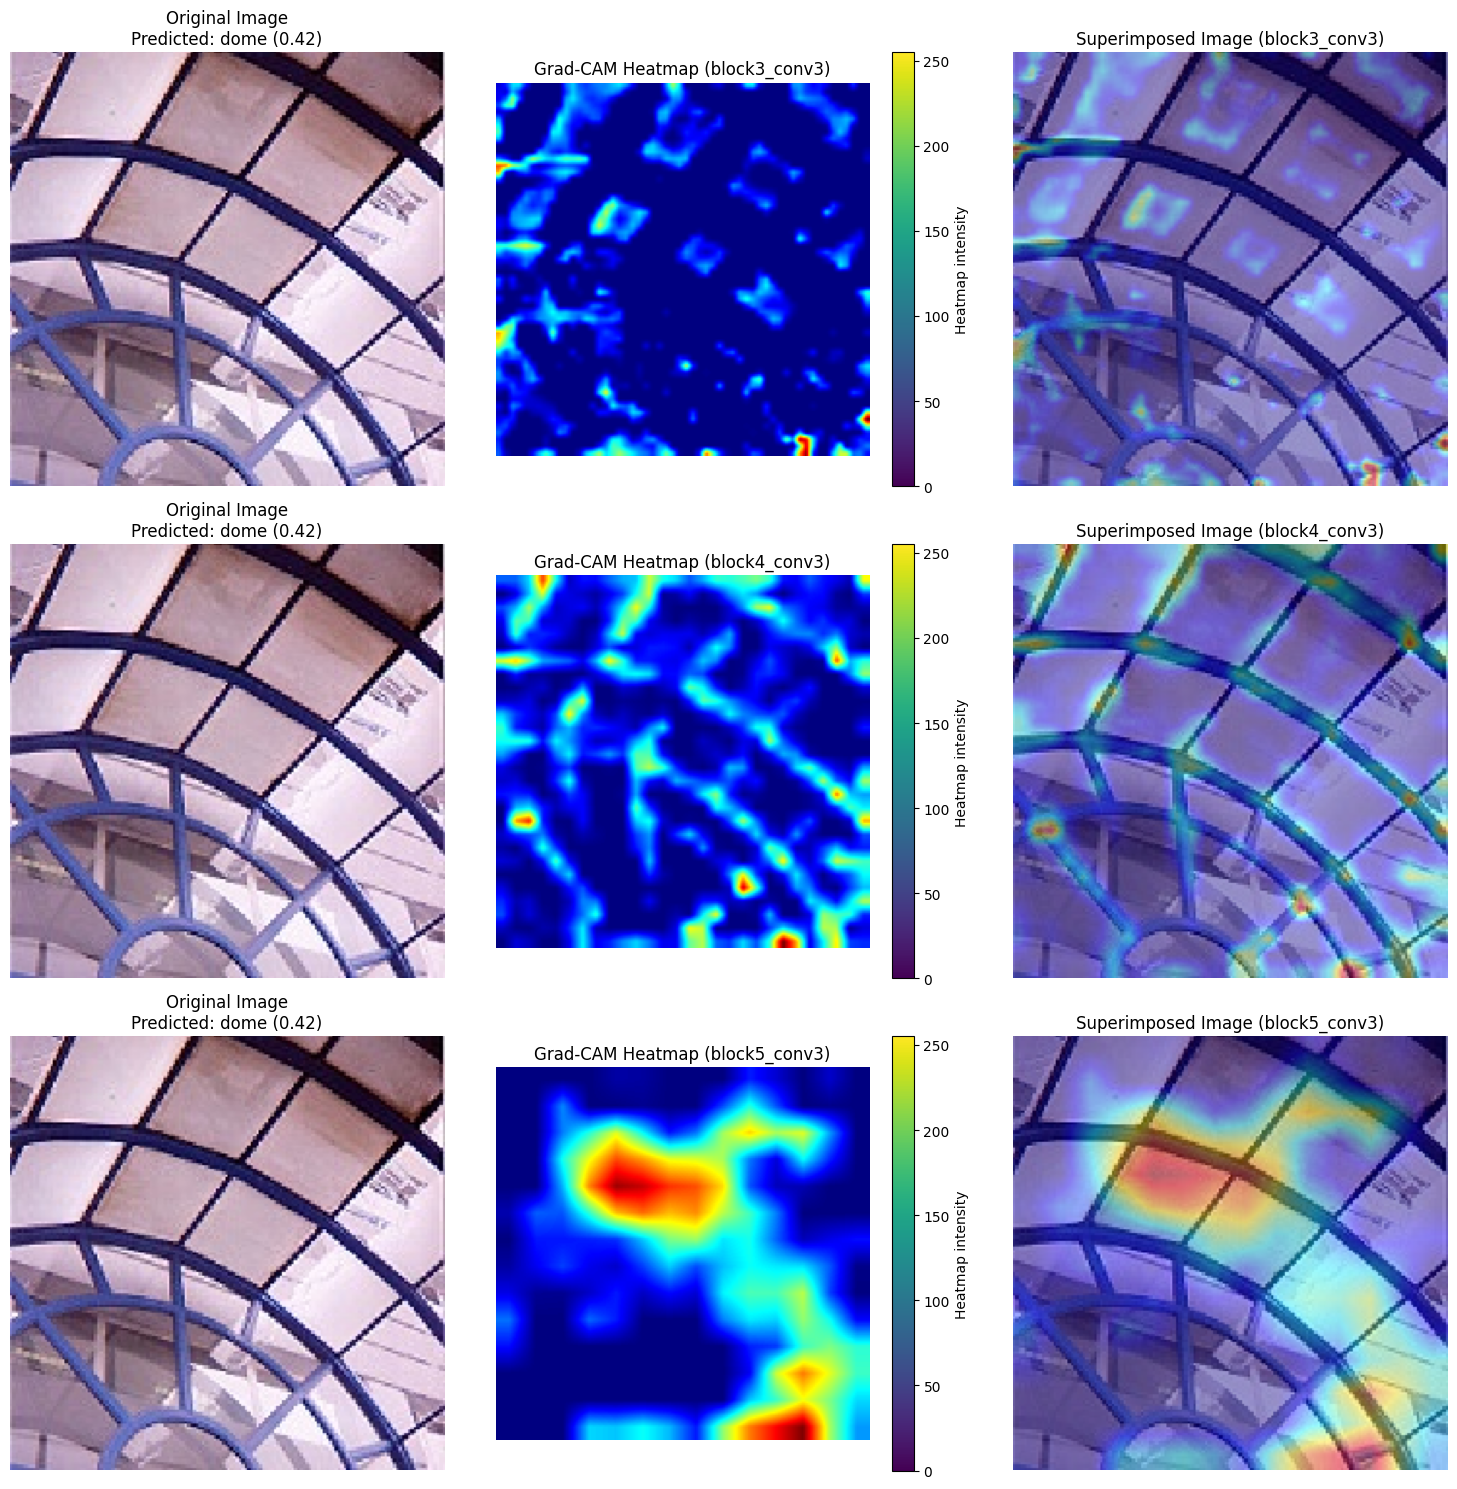

In [55]:
plt.figure(figsize=(15, 5 * len(layer_names)))
original_img = image.img_to_array(img) / 255.0
for i, layer_name in enumerate(layer_names):
    last_conv_layer = model.get_layer(layer_name)
    
    grad_model = tf.keras.models.Model([model.input], [last_conv_layer.output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(x)
        loss = predictions[:, predicted_class]
    
    grads = tape.gradient(loss, conv_outputs)[0]
    
    weights = tf.reduce_mean(grads, axis=(0, 1))
    cam = np.sum(weights * conv_outputs[0], axis=-1)
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (224, 224))
    cam = cam / cam.max() if cam.max() != 0 else cam

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    superimposed_img = cv2.addWeighted(
        original_img.astype('float32'), 0.6,
        heatmap.astype('float32') / 255, 0.4, 0
    )
    
    plt.subplot(len(layer_names), 3, 3 * i + 1)
    plt.title(f'Original Image\nPredicted: {pred_class_name} ({np.max(preds[0]):.2f})')
    plt.imshow(original_img)
    plt.axis('off')
    
    plt.subplot(len(layer_names), 3, 3 * i + 2)
    plt.title(f'Grad-CAM Heatmap ({layer_name})')
    plt.imshow(heatmap)
    plt.colorbar(label='Heatmap intensity')
    plt.axis('off')
    
    plt.subplot(len(layer_names), 3, 3 * i + 3)
    plt.title(f'Superimposed Image ({layer_name})')
    plt.imshow(superimposed_img)
    plt.axis('off')

plt.tight_layout()
plt.show()